<a href="https://colab.research.google.com/github/BigBubl1k/Design_pipes_on_the_floor_plan/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Тема: "Проектирование систем холодного водоснабжения на плане этажа"
#Описание: мы подаем нейронке картинку, - кусок плана этажа - на котором расположен стояк и сан.узел, а нейронка на выходе рисует трубу водоснабжения от стояка к сан.узлу

Я собрал базу, показать которую я не могу, - 203 фрагмента планов этажей



Каждый из этих фрагментов я занес в xTrain
а в xTest я занес те же фрагменты, но уже с запроектированными на них трубами,
которые должна выдать нейронка

In [ ]:
from tensorflow.keras.models import Model, Sequential # загружаем абстрактный класс базовой модели сети от кераса и последовательную модель
# Из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K # подтягиваем базовые керасовские функции
from tensorflow.keras.optimizers import Adam # загружаем выбранный оптимизатор
from tensorflow.keras import utils # загружаем утилиты кераса
from tensorflow.keras.datasets import mnist, fashion_mnist # загружаем готовые базы mnist
from tensorflow.keras.callbacks import LambdaCallback

import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
from tensorflow.keras.preprocessing import image # модуль для отрисовки изображения
import numpy as np # библиотека для работы с массивами данных
import pandas as pd # библиотека для анализа и обработки данных
from PIL import Image # модуль для отрисовки изображения
from sklearn.model_selection import train_test_split # модуль для разбивки выборки на тренировочную/тестовую
from sklearn.preprocessing import StandardScaler # модуль для стандартизации данных

import matplotlib.colors as colors
import os #
from google.colab import drive #модуль для работы с google диском 
import time, random
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

In [ ]:
drive.mount('/content/drive/') # монтируем google диск

Mounted at /content/drive/


#Аугментация базы: Повернем каждое изображение 3 раза и получим 4 примера вместо одного
Затем сохраним все на гугл диск
(при повороте картинки координаты точек кардинально изменятся)

In [ ]:
!unzip -q '/content/drive/MyDrive/Базы/база_резаная_32.zip' #распаковываем архив на google диске на локальный диск google colaboratory 

In [ ]:
!unzip -q '/content/drive/MyDrive/Базы/база_с_трубами_32.zip' #распаковываем архив на google диске на локальный диск google colaboratory 

In [ ]:

without_pipes = os.listdir('база_резаная') # получаем список папок в распакованной папке

with_pipes = os.listdir('база_с_трубами_32')
#Проверяем выгруженные папки
!ls 'база_резаная'
#И одну из папок
!ls 'база_с_трубами_32'

'image_2022-01-29_00-36-31_(2).png'    image_2022-01-31_12-20-29.png
'image_2022-01-29_00-36-31_(3).png'   'image_2022-01-31_12-22-27_(10).png'
 image_2022-01-29_00-36-31.png	      'image_2022-01-31_12-22-27_(2).png'
'image_2022-01-29_00-41-04_(2).png'   'image_2022-01-31_12-22-27_(3).png'
'image_2022-01-29_00-41-04_(3).png'   'image_2022-01-31_12-22-27_(4).png'
'image_2022-01-29_00-41-04_(4).png'   'image_2022-01-31_12-22-27_(5).png'
'image_2022-01-29_00-41-04_(5).png'   'image_2022-01-31_12-22-27_(6).png'
'image_2022-01-29_00-41-04_(6).png'   'image_2022-01-31_12-22-27_(7).png'
'image_2022-01-29_00-41-04_(7).png'   'image_2022-01-31_12-22-27_(8).png'
'image_2022-01-29_00-41-04_(8).png'   'image_2022-01-31_12-22-27_(9).png'
'image_2022-01-29_00-41-04_(9).png'    image_2022-01-31_12-22-27.png
 image_2022-01-29_00-41-04.png	      'image_2022-01-31_13-08-13_(10).png'
'image_2022-01-31_11-32-33_(10).png'  'image_2022-01-31_13-08-13_(2).png'
'image_2022-01-31_11-32-33_(2).png'   'image_202

In [ ]:
from PIL import Image
import numpy
l=1
for i in without_pipes:
  im= Image.open('/content/база_резаная/'+i)
  im2= Image.open('/content/база_с_трубами_32/'+i)

  im.save('/content/drive/MyDrive/Базы/812_без_труб/'+str(l)+'.png')
  im2.save('/content/drive/MyDrive/Базы/812_с_трубами/'+str(l)+'.png')
  l+=1

  im = im.rotate(90, expand=True)
  im2 = im2.rotate(90, expand=True)
  im.save('/content/drive/MyDrive/Базы/812_без_труб/'+str(l)+'.png')
  im2.save('/content/drive/MyDrive/Базы/812_с_трубами/'+str(l)+'.png')
  l+=1

  im = im.rotate(90, expand=True)
  im2 = im2.rotate(90, expand=True)
  im.save('/content/drive/MyDrive/Базы/812_без_труб/'+str(l)+'.png')
  im2.save('/content/drive/MyDrive/Базы/812_с_трубами/'+str(l)+'.png')
  l+=1

  im = im.rotate(90, expand=True)
  im2 = im2.rotate(90, expand=True)
  im.save('/content/drive/MyDrive/Базы/812_без_труб/'+str(l)+'.png')
  im2.save('/content/drive/MyDrive/Базы/812_с_трубами/'+str(l)+'.png')
  l+=1


#Заберем базу с гугл диска ( 812 примеров без труб и с трубами)

In [ ]:
!unzip -q '/content/drive/MyDrive/Базы/база_для_диплома_32.zip' #распаковываем архив на google диске на локальный диск google colaboratory 

In [ ]:
without_pipes = os.listdir('812_без_труб') # получаем список папок в распакованной папке

with_pipes = os.listdir('812_с_трубами')
#Проверяем выгруженные папки
!ls '812_без_труб'
#И одну из папок
!ls '812_с_трубами'

100.png  183.png  265.png  347.png  429.png  510.png  593.png  675.png	757.png
101.png  184.png  266.png  348.png  42.png   511.png  594.png  676.png	758.png
102.png  185.png  267.png  349.png  430.png  512.png  595.png  677.png	759.png
103.png  186.png  268.png  34.png   431.png  513.png  596.png  678.png	75.png
104.png  187.png  269.png  350.png  432.png  514.png  597.png  679.png	760.png
105.png  188.png  26.png   351.png  433.png  515.png  598.png  67.png	761.png
106.png  189.png  270.png  352.png  434.png  516.png  599.png  680.png	762.png
107.png  18.png   271.png  353.png  435.png  517.png  59.png   681.png	763.png
108.png  190.png  272.png  354.png  436.png  518.png  5.png    682.png	764.png
109.png  191.png  273.png  355.png  437.png  519.png  600.png  683.png	765.png
10.png	 192.png  274.png  356.png  438.png  51.png   601.png  684.png	766.png
110.png  193.png  275.png  357.png  439.png  520.png  602.png  685.png	767.png
111.png  194.png  276.png  358.png  43.png   521.png  6

#Возьмем каждое изображение, переведем в нампай и добавим в xTrain и xTest, где тестом будут изображения с трубами (выход с автокодировщика)

In [ ]:
#посмотрим на изменение типа xTrain
xTrain = []

img= Image.open('/content/812_без_труб/'+without_pipes[1])
img = img.resize((200,200))
np_img = np.array(img)
xTrain.append(np_img)
print(xTrain)
print(type(xTrain))
print()

xTrain = np.array(xTrain)
print(type(xTrain))
print(xTrain.shape)

[array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [236, 236, 236, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [251, 251, 251, 255],
        [247, 247, 247, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [245, 245, 245, 255],
        [240, 240, 240, 255],
        [253, 253, 253, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [217, 217, 217, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [234, 234, 234, 255],
        [219, 219, 219, 255]],

       [[25

In [ ]:
from PIL import Image
import numpy

xTrain = []

for i in without_pipes:
  img= Image.open('/content/812_без_труб/'+i)
  img = img.resize((200,200))
  np_img = numpy.array(img)
  xTrain.append(np_img)

xTrain = np.array(xTrain)
print(type(xTrain))
print(xTrain.shape)

<class 'numpy.ndarray'>
(812, 200, 200, 4)


In [ ]:
#то же самое сделаю с xTest (примеры с трубами)
#пойдет на выход автокодировщика

xTest = []

for i in with_pipes:
  img= Image.open('/content/812_с_трубами/'+i)
  img = img.resize((200,200))
  np_img = numpy.array(img)
  xTest.append(np_img)

xTest = np.array(xTest)
print(type(xTest))
print(xTest.shape)

<class 'numpy.ndarray'>
(812, 200, 200, 4)


In [ ]:
xTest[0].shape

(200, 200, 4)

In [ ]:
xTrain[0].shape

(200, 200, 4)

Теперь из нампи переведем обратно и посмотрим на картинки из трэйна и теста

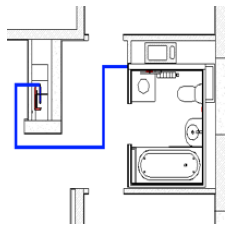

In [ ]:
img= Image.open('/content/812_с_трубами/'+with_pipes[548])
img = img.resize((200,200))
plt.axis('off')
plt.imshow(img)

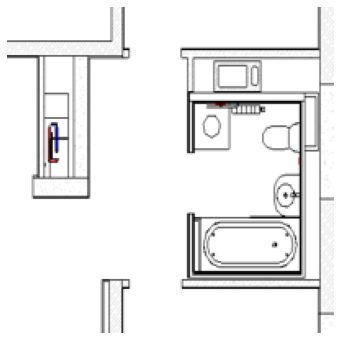

In [ ]:
plt.figure(figsize=(6,6))
image1 = Image.fromarray(xTrain[548].astype('uint8'))
plt.axis('off')
plt.imshow(image1)

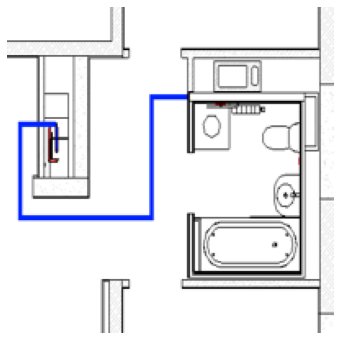

In [ ]:
plt.figure(figsize=(6,6))
image2 = Image.fromarray(xTest[548].astype('uint8'))
plt.axis('off')
plt.imshow(image2)

# Теперь нормализуем и пишем функции



In [ ]:
xTrain = xTrain.astype('float32')/255 # представляем в виде значений от 0 до 1
xTest = xTest.astype('float32')/255 # представляем в виде значений от 0 до 1
xTrain.shape

(812, 200, 200, 4)

In [ ]:

xTest.shape

(812, 200, 200, 4)

In [ ]:
def baseAutoencoder(shape=(112,80,3)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # пропускаем через слой нормализации данных 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    z = MaxPooling2D()(x) # передаём на слой подвыборки
    

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)
    x = BatchNormalization()(x) # слой нормализации данных
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    # Сжатие MaxPooling2D не применяем

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 56*40 на 112*80)
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    return model # функция вернёт заданную модель

In [ ]:
def plotImages(xTrain, pred, shape=(112, 80)): # создадим функцию для вывода изображений как картинок
  n = 5  # количество картинок, которые хотим показать
  plt.figure(figsize=(14, 7)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(xTrain[index].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()

In [ ]:
# Функция для расчета mse
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [ ]:
model = baseAutoencoder((200,200,4)) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


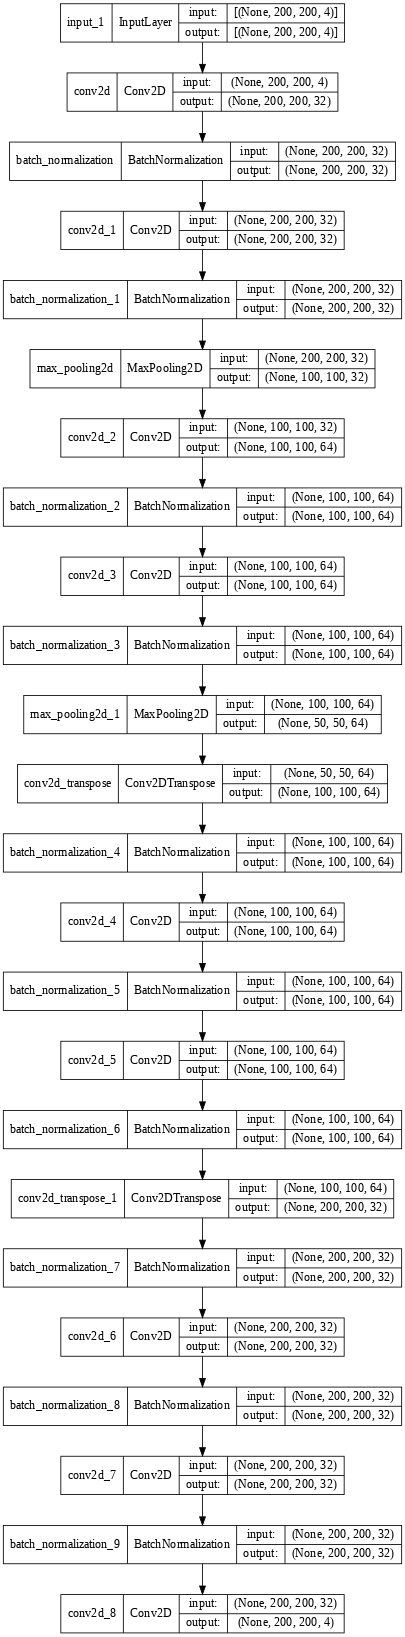

In [ ]:
utils.plot_model(model, dpi=60, show_shapes=True)

#Запуск нейронки

у нас всего 812 примеров. закинем 802 на обучение и 10 на проверку предикта

In [ ]:
history = model.fit(xTrain[:802], xTest[:802], epochs=100, batch_size=40)

Epoch 1/100
21/21 [==============================] - 22s 322ms/step - loss: 0.2603
Epoch 2/100
21/21 [==============================] - 6s 301ms/step - loss: 0.2210
Epoch 3/100
21/21 [==============================] - 6s 300ms/step - loss: 0.1947
Epoch 4/100
21/21 [==============================] - 6s 301ms/step - loss: 0.1738
Epoch 5/100
21/21 [==============================] - 6s 305ms/step - loss: 0.1554
Epoch 6/100
21/21 [==============================] - 6s 301ms/step - loss: 0.1392
Epoch 7/100
21/21 [==============================] - 6s 302ms/step - loss: 0.1251
Epoch 8/100
21/21 [==============================] - 6s 303ms/step - loss: 0.1132
Epoch 9/100
21/21 [==============================] - 6s 304ms/step - loss: 0.1032
Epoch 10/100
21/21 [==============================] - 6s 305ms/step - loss: 0.0947
Epoch 11/100
21/21 [==============================] - 6s 303ms/step - loss: 0.0873
Epoch 12/100
21/21 [==============================] - 6s 305ms/step - loss: 0.0810
Epoch 13/100

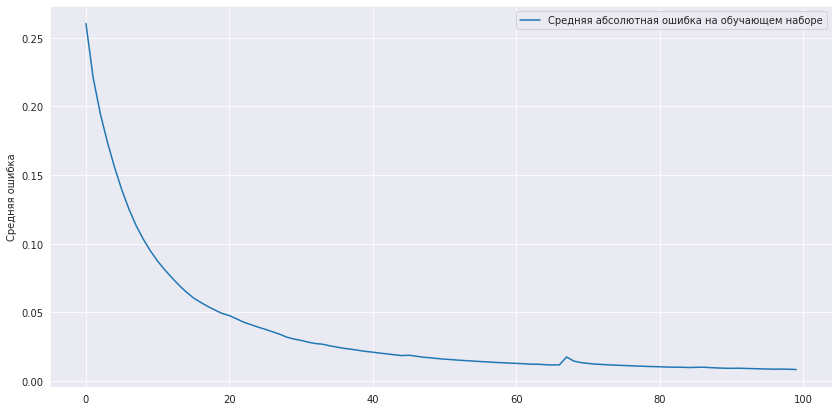

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

#Результаты

In [ ]:
predict = model.predict(xTest[802:]) # Получаем результат работы модели на тестовой выборке
predict = predict * 255 # представляем в виде значений от 0 до 255
predict = predict.astype('uint8')

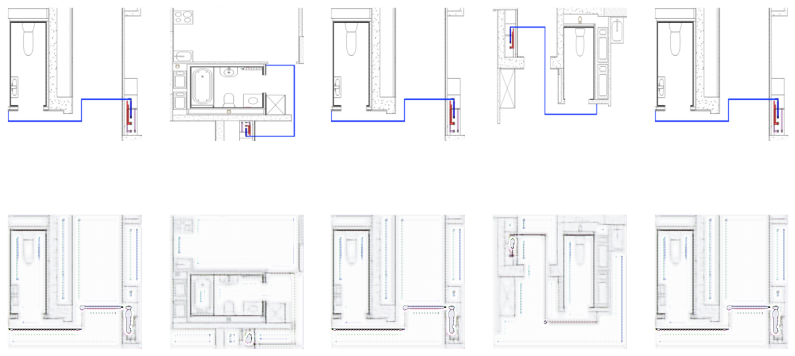

In [ ]:
plotImages(xTest[802:], predict, shape=(200,200,4)) 

In [ ]:
predMnistTest = model.predict(xTrain[802:]) # Получаем результат работы модели на тестовой выборке
predMnistTest = predMnistTest * 255 # представляем в виде значений от 0 до 255
predMnistTest = predMnistTest.astype('uint8')

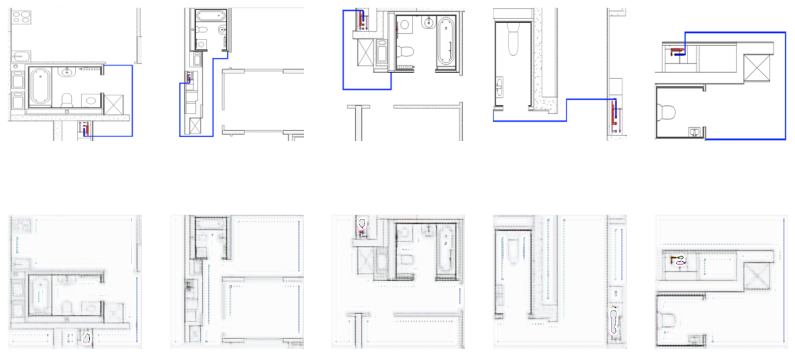

In [ ]:
plotImages(xTest[802:], predMnistTest, shape=(200,200,4)) 

сверху то, что мы должны получить, а снизу то, что получили 

#Итог

Нейронка довольно неплохо восстанавливает изображение, но, пусть и слабо, но трубы рисует: мы подали в предикт xTrain (база картинок без труб), спредиктили это и получили изображения снизу уже с трубами

Увеличением базы мы повысим качество вывода автокодировщика, также можно было бы попробовать увеличить количество фильтров в сверточных слоях
Так же я бы попробовал архитектуру Unet

Альтернатива: также я пытался решать данную задачу через генетику: предполагалось, что мы будем награждать или снимать очки нейронке за то, как она проводит линии от стояка к санузлу (если, допустим, пересечет линия стену - вычитаем баллы, если пойдет ровно от точки А к точке Б - плюс очки)